In [1]:
import numpy as np

class linReg:
    def __init__(self, lr = 0.0001, iters = 5000):
        self.lr = lr
        self.iters = iters

    def fit(self, x, y):
        self.weights = np.array(x[-1]) - np.array(x[0])
        self.w0 = y[0]-np.sum(x[0]*self.weights)
        for i in range(self.iters):
            pred = (np.sum(x*self.weights, axis=1) + self.w0).reshape(len(x))
            tmp1 = np.sum((pred - y) * x.transpose(), axis=1) * 2
            tmp2 = tmp1 / x.shape[0]
            self.weights = self.weights - self.lr*np.sum((pred - y) * x.transpose(), axis=1) * 2 / x.shape[0]
            self.w0 = self.w0 - self.lr*np.sum(pred - y) * 2 / x.shape[0]
        self.w = np.append(self.weights, self.w0)

    def predict(self, x):
        return np.sum(x*self.weights, axis=1) + self.w0

[[11.12362036]
 [13.85214292]
 [14.19598183]
 [14.79597545]
 [14.46805592]
 [15.46798356]
 [16.17425084]
 [19.59852844]
 [19.80334504]
 [21.12421773]
 [20.06175348]
 [23.90972956]]


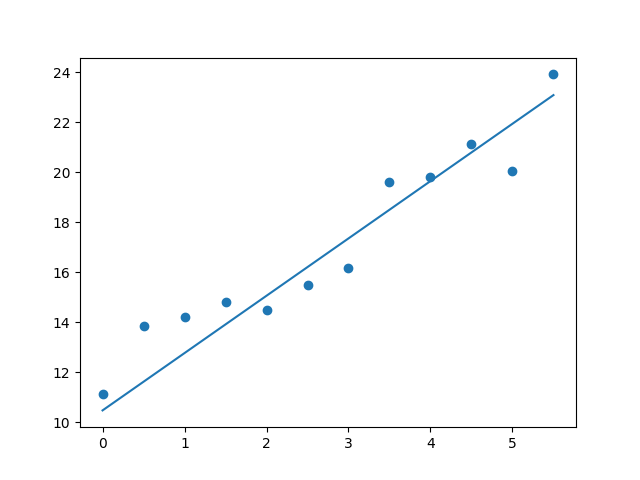

[ 2.29401936 10.46474441]


In [2]:
import matplotlib.pyplot as plt
%matplotlib widget
np.random.seed(42)

x = np.array([[x] for x in np.arange(0.0, 6.0, 0.5)])
y = np.array([[2*x[0] + 10 + np.random.rand()*3] for x in x.tolist()])
plt.scatter(x, y)
#Test of custom linreg model:
model = linReg(iters=3000)
print(y)
model.fit(x, y.reshape(12))
pred = model.predict(x)
plt.plot(x, pred)
plt.show()
print(model.w)

In [3]:
# Checking on example data dataset

from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
np.random.seed(42)

linRegInstance = linReg(iters=3000, lr=0.001)
linRegInstance.fit(x, y.reshape(12))
pred = linRegInstance.predict(x)

plt.scatter(x, y)
plt.plot(x, pred, c='red')

linRegInstance.w

array([ 2.07059254, 11.28528716])

[-3.47160402 -0.13475032 18.01726601]


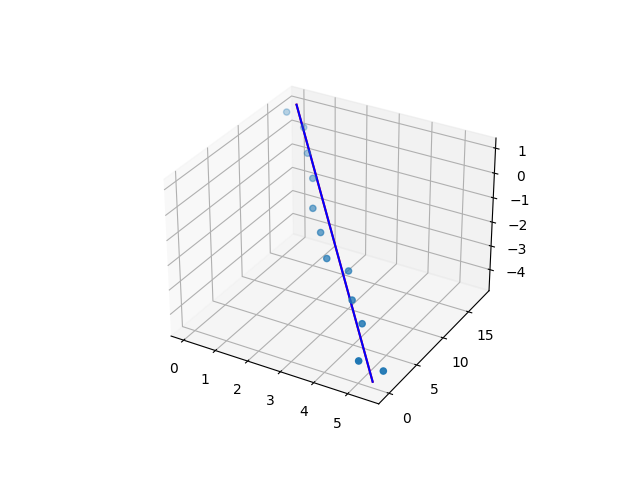

In [4]:
from mpl_toolkits.mplot3d import Axes3D
x = np.array([[x, y] for x , y in zip(np.arange(0.0, 6.0, 0.5), 1 - np.arange(0.0, 6.0, 0.5))])
x_coord = np.array([x[0] for x in x.tolist()])
z_coord = np.array([x[1] for x in x.tolist()])
y = np.array([2*x[0]+5*x[1] + 10 + np.random.rand()*3 for x in x.tolist()])
model = linReg(0.0001, 10000)
model.fit(x, y)
pred = model.predict(x)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_coord, y, z_coord)
ax.plot(x_coord, pred, z_coord, c='red')
ax.plot(x_coord, x_coord*model.w[0] + z_coord*model.w[1] + model.w[2], z_coord, c='blue')
plt.draw()
print(model.w)
